<a href="https://colab.research.google.com/github/AbszG/hotel-price-EDA-and-prediction-model/blob/main/Hotel_Price_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cleaning the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Dynamic Hotel Booking Price Pred/hotel_bookings.csv')
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.describe()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,...,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,34465.068657,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,...,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,89541.750000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [ ]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Unnamed: 0,0,0.000000
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000


In [ ]:
df.fillna(0, inplace = True)

In [ ]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [ ]:
df.drop(['adults', 'children', 'babies'], axis = 1, inplace = True)

In [ ]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


**EDA**

From where the most guests are coming ?

In [ ]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


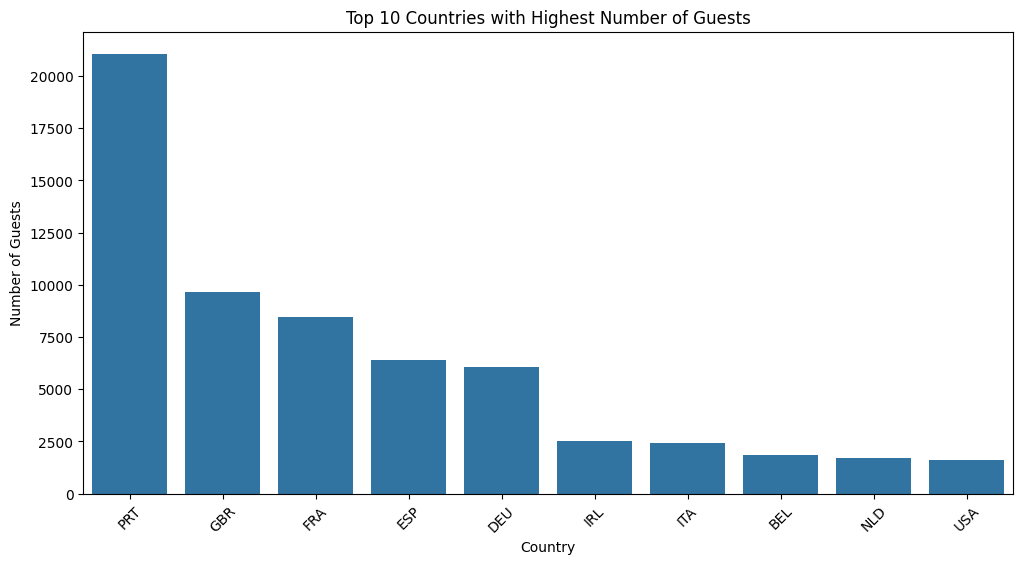

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.barplot(x = 'country', y = 'No of guests', data = country_wise_guests.head(10))
plt.title('Top 10 Countries with Highest Number of Guests')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.show()


How much is a room per night ?

In [ ]:
import folium
import plotly.express as px

data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = ['reserved_room_type' , 'meal'], y = 'adr', color = 'hotel')

Price over Year


In [ ]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [ ]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

In [ ]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [ ]:
import sort_dataframeby_monthorweek as sd #sorting months

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [ ]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [ ]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months')

<Figure size 1700x800 with 0 Axes>

Busy Months

In [ ]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']

city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']

final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']


final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [ ]:
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months')

In [ ]:
#City hotel has the most guests from March to October which also has the highest prices at those months.
#Resort hotel has the most guests in July and August which also has the highest prices at those months.

How long do people stay at the hotels?

In [ ]:
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

<ipython-input-22-a6d36badedd5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


In [ ]:

stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Unnamed: 0
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


In [ ]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Unnamed: 0', color = 'hotel', barmode = 'group',
        )

In [ ]:
df.columns

Index(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_guests'],
      dtype='object')

In [ ]:
df['hotel'] = df['hotel'].astype('category').cat.codes

# Calculate correlation on numeric columns only
correlation = df.select_dtypes(include=['number']).corr()['adr'].abs().sort_values(ascending = False)
print(correlation)

adr                               1.000000
total_guests                      0.368105
arrival_date_year                 0.197580
total_of_special_requests         0.172185
Unnamed: 0                        0.147357
is_repeated_guest                 0.134314
company                           0.128470
hotel                             0.096719
arrival_date_week_number          0.075791
previous_bookings_not_canceled    0.072144
previous_cancellations            0.065646
stays_in_week_nights              0.065237
lead_time                         0.063077
required_car_parking_spaces       0.056628
stays_in_weekend_nights           0.049342
is_canceled                       0.047557
days_in_waiting_list              0.040756
arrival_date_day_of_month         0.030245
booking_changes                   0.019618
agent                             0.016707
Name: adr, dtype: float64


In [ ]:
df.to_csv('/content/drive/MyDrive/Dynamic Hotel Booking Price Pred/cleaned_data.csv')